In [18]:
%load_ext autoreload
%autoreload 2
from modelproject import Solow
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2

In [19]:
model = Solow()

In [20]:
model.par.simT = 1000
discrete_optimum = model.find_opt_s(discrete=True)


In [21]:
continueous_solution = model.find_opt_s(discrete=False)
print(continueous_solution.sK, continueous_solution.sH)

/Users/carlsimpson/miniconda3/envs/numecon/lib/python3.9/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


0.3333333558138229 0.3333332845296211


# a shock to sh i steady state

In [22]:
model.par.A_init = 1
model.par.K_init = 1
model.par.L_init = 1
model.par.H_init = 1
baseline = model.find_steady_state(sK=0.12, sH=0.07, do_print=True)

baseline.steadystate_t

Steady state reached in period 374


374

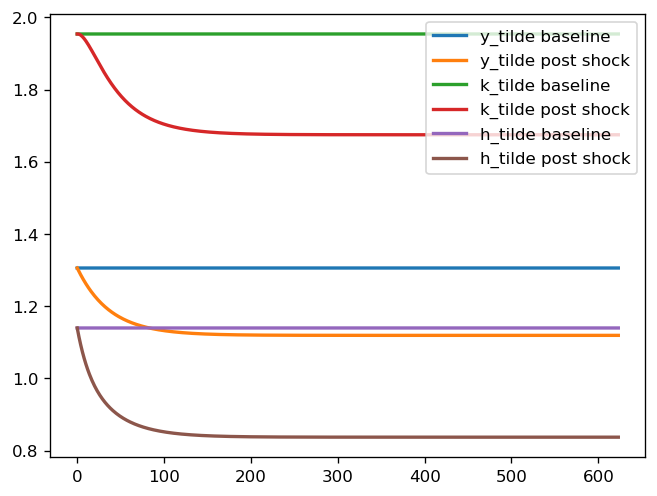

In [23]:
model.plotbaseline_vs_new_sh(new_sH=0.06)

In [24]:
model.plotbaseline_vs_new_sh_intactive()


interactive(children=(SelectionSlider(description='new_sH', options=(0.0, 0.001794871794871795, 0.003589743589…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [25]:
import ipywidgets as widgets
from ipywidgets import Output, SelectionSlider
from IPython.display import display, clear_output

new_sH_slider = widgets.FloatSlider(min=0, max=0.07, step=0.001, value=0.065)
widgets.interact(model.plotbaseline_vs_new_sh, new_sH=new_sH_slider)
clear_output(wait=True)

interactive(children=(FloatSlider(value=0.065, description='new_sH', max=0.07, step=0.001), Output()), _dom_cl…

In [26]:
model.par.A_init = baseline.A[374]
model.par.K_init = baseline.K[374]
model.par.L_init = baseline.L[374]
model.par.H_init = baseline.H[374]

post_shock = model.find_steady_state(sK=0.12, sH=0.05, do_print=True)

fig = plt.figure()

Steady state reached in period 378


<Figure size 640x480 with 0 Axes>

In [27]:
from types import SimpleNamespace

In [28]:

baseline_test = SimpleNamespace()
baseline_test.y_tilde = baseline.y_tilde[374:]
baseline_test.k_tilde = baseline.k_tilde[374:]
baseline_test.h_tilde = baseline.h_tilde[374:]

post_shock_periods_index = int(model.par.simT)- 2 - len(baseline_test.k_tilde)

post_shock.y_tilde  =  post_shock.y_tilde[:-post_shock_periods_index]
post_shock.k_tilde  =  post_shock.k_tilde[:-post_shock_periods_index]
post_shock.h_tilde  =  post_shock.h_tilde[:-post_shock_periods_index]

print(len(baseline_test.k_tilde), len(post_shock.h_tilde))


624 624


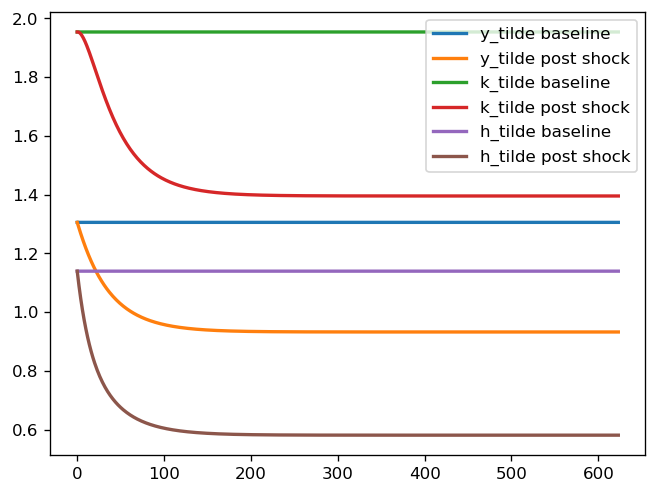

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120)

ax.plot(baseline_test.y_tilde, label='y_tilde baseline')
ax.plot(post_shock.y_tilde, label='y_tilde post shock')

ax.plot(baseline_test.k_tilde, label='k_tilde baseline')
ax.plot(post_shock.k_tilde, label='k_tilde post shock')

ax.plot(baseline_test.h_tilde, label = 'h_tilde baseline')
ax.plot(post_shock.h_tilde, label = 'h_tilde post shock')

ax.legend(loc='upper right')



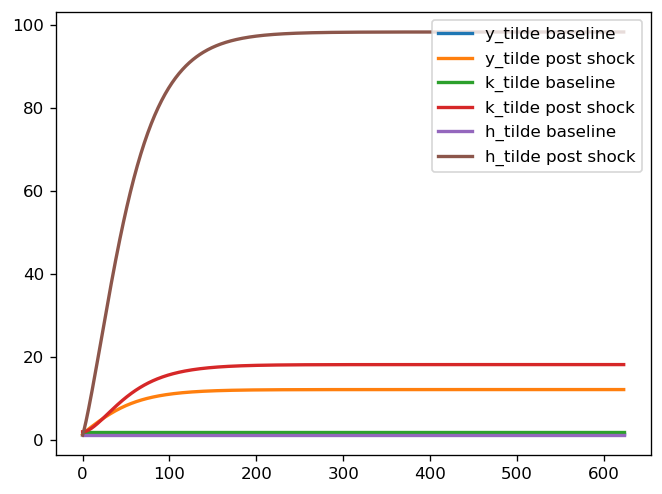

In [30]:
model.plotbaseline_vs_new_sh(new_sH=0.65)

### Reformkommissionen Nye Reformveje 1's effects in the solow model with human capital
On april 6th 2022 Reformkommissionen recommended shortening the length of roughly half of the mastser's degrees in Denmark in the report [Nye Reformveje 1](reformkommissionen) . The suggestions from Reformkommisionen's suggestion has sparked a severe debate e.g in [Jyllandsposten](https://reformkommissionen.dk/media/25523/nye-reformveje-1_web.pdfhttps://reformkommissionen.dk/media/25523/nye-reformveje-1_web.pdf) or [Politiken](https://politiken.dk/debat/debatindlaeg/art9148200/Er-kortere-uddannelse-virkelig-en-katastrofe). 


One way of interpreting Reformkommisionen's suggestion, is as a reduction in the savings rate of human capital. Thus we believe that the Solow model with human capital is a highly relevant framework to aanlyze the predictions of Reformkomissionen's suggestion.

In [31]:
model.par.simT

1000

# Conclusion

We find that the theoretical predictions and simulations results align, and that our model converges for all testede initial values of $K$ and $H$. We further find that the optimal saving rates for physical and human capital are equal to the relative marginal productivity of $\alpha$ and $\phi$ respectively. We also find that decresing the savings rate of human capital has negative effects on production no matter how much it is decreased. All our results are based on dubious assumptions and ought to be tested by structural estimation of the relevant parameters. However, if one believes in the framework of the Solow model with human capital, one can conclude that only in the case that  Denmark is saving more than the emperical $\phi$ in human capital, it would make sense to decrease the savings rate of human capital.

<div class="csl-entry">Sørensen, P. B., &#38; Whitta-Jacobsen, H. J. (2010). <i>Introducing Advanced Macroeconomics Growth and Business Cycles</i> (Second edtion). McGraw Hill education.</div>

In [35]:
from numericalsavings import Solow

In [36]:
model = Solow()



In [37]:
model.plot_convergence_interactive()

interactive(children=(SelectionSlider(description='H_init', index=39, options=(0.0, 0.1282051282051282, 0.2564…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>